In [355]:
import pandas as pd
df=pd.read_csv('Uncleaned_DS_jobs.csv')

In [356]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [358]:
df.isna().any()
df = df.drop('Competitors',axis=1)

Removing unnecessary characters from Salary estimate so we can find the min,max and avg salary for that position

In [359]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('[^0-9-]','',regex=True)
df['Salary Estimate']
#df['Salary Estimate']=df['Salary Estimate'].apply(lambda X : X[0:3]+'-'+X[3:]) 
#df.head()

0      137-171
1      137-171
2      137-171
3      137-171
4      137-171
        ...   
667    105-167
668    105-167
669    105-167
670    105-167
671    105-167
Name: Salary Estimate, Length: 672, dtype: object

In [360]:
#df['min_salary'] = df['Salary Estimate'].apply(lambda X : X[0:3]) 
#df['max_salary'] = df['Salary Estimate'].apply(lambda X : X[4:]) 

df[['min_salary','max_salary']] = df['Salary Estimate'].str.split('-',expand=True)

In [361]:
df['min_salary']=df['min_salary'].apply(lambda X : int(X))
df['max_salary']=df['max_salary'].apply(lambda X : int(X))


In [362]:
df[df['min_salary']==79]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary
62,62,Data Scientist,79-131,Introduction\n\nHave you always wanted to run ...,3.5,iRobot\n3.5,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),79,131
63,63,Data Scientist,79-131,About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,79,131
64,64,Global Data Analyst,79-131,Global Data Analyst\nJob Code\n\n3938\n\nLocat...,3.8,Dermalogica\n3.8,"Carson, CA","Carson, CA",201 to 500 employees,1986,Subsidiary or Business Segment,Consumer Products Manufacturing,Manufacturing,$100 to $500 million (USD),79,131
65,65,Data Engineer,79-131,POSITION SUMMARY\n\n\nThe candidate will be jo...,3.7,Bayview Asset Management\n3.7,"Coral Gables, FL","Coral Gables, FL",1001 to 5000 employees,1995,Company - Private,Investment Banking & Asset Management,Finance,$100 to $500 million (USD),79,131
66,66,Data Scientist,79-131,"As a Data Scientist, you'll utilize advanced q...",3.7,Via Transportation\n3.7,"New York, NY","New York, NY",501 to 1000 employees,2012,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,79,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,441,Data Scientist,79-133,Job Description\nWe are looking for a Data Sci...,5.0,Maxiom\n5.0,"Ashburn, VA","Ashburn, VA",1 to 50 employees,-1,Company - Public,-1,-1,Unknown / Non-Applicable,79,133
442,442,Data Scientist,79-133,Job Description\n\nTransforming the future of ...,2.7,Change Healthcare\n2.7,"Lombard, IL","Nashville, TN",10000+ employees,2007,Company - Public,IT Services,Information Technology,Unknown / Non-Applicable,79,133
443,443,Data Scientist,79-133,"Job Description\nInfoscitex, a DCS company, is...",4.1,DCS Corp\n4.1,"Hampton, VA","Alexandria, VA",1001 to 5000 employees,1977,Company - Private,Research & Development,Business Services,$100 to $500 million (USD),79,133
444,444,Data Scientist,79-133,About Hive\n\nHive is a full-stack deep learni...,2.1,Hive (CA)\n2.1,"San Francisco, CA","Los Angeles, CA",Unknown,2019,Company - Private,Telecommunications Services,Telecommunications,Unknown / Non-Applicable,79,133


In [363]:
df['avg_salary'] = df[['min_salary','max_salary']].mean(axis=1)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154.0
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154.0
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154.0
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154.0
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154.0


In [364]:
df['Company Name']=df['Company Name'].str.replace('[\n\d]','',regex=True)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154.0
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154.0
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154.0
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154.0
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154.0


In [365]:
df[['city','state']]=df['Location'].str.split(',',1,expand=True)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,city,state
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154.0,New York,NY
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154.0,Chantilly,VA
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154.0,Boston,MA
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154.0,Newton,MA
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154.0,New York,NY


In [366]:
df['python']=df['Job Description'].apply(lambda X: 1 if 'python' in X.lower() else 0)
df['sql']=df['Job Description'].apply(lambda X: 1 if 'sql' in X.lower() else 0)
df['statistics']=df['Job Description'].apply(lambda X: 1 if 'statistics' in X.lower() else 0)
df['aws']=df['Job Description'].apply(lambda X: 1 if 'aws' in X.lower() else 0)
df['azure']=df['Job Description'].apply(lambda X: 1 if 'azure' in X.lower() else 0)
df['hadoop']=df['Job Description'].apply(lambda X: 1 if 'hadoop' in X.lower() else 0)
df['spark']=df['Job Description'].apply(lambda X: 1 if 'spark' in X.lower() else 0)
df['tableau']=df['Job Description'].apply(lambda X: 1 if 'tableau' in X.lower() else 0)
df['machine learning']=df['Job Description'].apply(lambda X: 1 if 'machine learning' in X.lower() else 0)


In [416]:
def modified_title(actual_title):
    modified_title=actual_title.lower()
    if 'data scientist' in modified_title:
        return 'data scientist'
    elif 'analyst' in modified_title:
        return 'data analyst'
    elif 'data engineer' in modified_title:
        return 'data engineer'
    elif 'machine learning' in modified_title:
        return 'mle'
    else:
        return 'na'
    

In [417]:
df['simplified_job_title']=df['Job Title'].apply(modified_title)


In [418]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,sql,statistics,aws,azure,hadoop,spark,tableau,machine learning,simplified_job_title,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,1,1,1,0,0,0,1,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,1,1,0,0,1,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,0,1,1,0,0,0,0,1,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,1,0,1,0,0,0,0,1,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,1,0,0,0,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT.,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,...,1,1,0,0,1,0,1,1,data scientist,na
668,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,data scientist,na
669,Data Scientist,105-167,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,...,1,1,0,0,1,0,1,1,data scientist,na
670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated.,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,...,1,1,0,0,1,1,0,1,data scientist,na


In [370]:
def seniority(actual_title):
    level=actual_title.lower()
    emp = ['sr','senior','lead','principal','vp','vice president','director']
    for i in emp:
        if i in level:
            return 'senior'
        else:
            return 'na'

In [371]:
df['seniority']=df['Job Title'].apply(seniority)

In [372]:
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,sql,statistics,aws,azure,hadoop,spark,tableau,machine learning,simplified_job_title,seniority
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,0,1,1,1,0,0,0,1,data scientist,senior
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,1,1,0,0,1,0,0,1,data scientist,na
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,0,1,1,0,0,0,0,1,data scientist,na
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,1,0,1,0,0,0,0,1,data scientist,na
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,...,1,1,0,0,0,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT.,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,...,1,1,0,0,1,0,1,1,data scientist,na
668,668,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,...,0,0,0,0,0,0,0,0,data scientist,na
669,669,Data Scientist,105-167,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,...,1,1,0,0,1,0,1,1,data scientist,na
670,670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated.,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,...,1,1,0,0,1,1,0,1,data scientist,na


In [373]:
df.drop('index',axis=1,inplace=True)
df.reset_index()
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,sql,statistics,aws,azure,hadoop,spark,tableau,machine learning,simplified_job_title,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,1,1,1,0,0,0,1,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,1,1,0,0,1,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,0,1,1,0,0,0,0,1,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,1,0,1,0,0,0,0,1,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,1,0,0,0,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT.,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,...,1,1,0,0,1,0,1,1,data scientist,na
668,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,data scientist,na
669,Data Scientist,105-167,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,...,1,1,0,0,1,0,1,1,data scientist,na
670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated.,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,...,1,1,0,0,1,1,0,1,data scientist,na


In [374]:
df.to_csv('Data_science Job',index=False)

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             672 non-null    object 
 1   Salary Estimate       672 non-null    object 
 2   Job Description       672 non-null    object 
 3   Rating                672 non-null    float64
 4   Company Name          672 non-null    object 
 5   Location              672 non-null    object 
 6   Headquarters          672 non-null    object 
 7   Size                  672 non-null    object 
 8   Founded               672 non-null    int64  
 9   Type of ownership     672 non-null    object 
 10  Industry              672 non-null    object 
 11  Sector                672 non-null    object 
 12  Revenue               672 non-null    object 
 13  min_salary            672 non-null    int64  
 14  max_salary            672 non-null    int64  
 15  avg_salary            6

In [376]:
state = df['state'].value_counts()
top_states = state[:10]
top_states

 CA    165
 VA     89
 MA     62
 NY     52
 MD     39
 IL     30
 DC     26
 TX     17
 WA     16
 OH     14
Name: state, dtype: int64

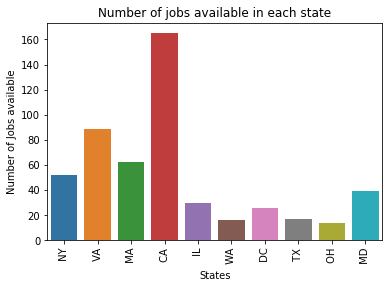

In [377]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x = 'state',
            data = df[df['state'].isin(top_states.index)])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Number of Jobs available')
plt.title('Number of jobs available in each state')
plt.show()


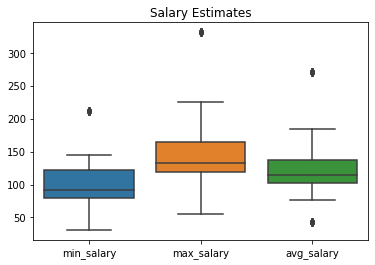

In [380]:
sns.boxplot(data = df[['min_salary','max_salary','avg_salary']])
plt.title('Salary Estimates')
plt.show()

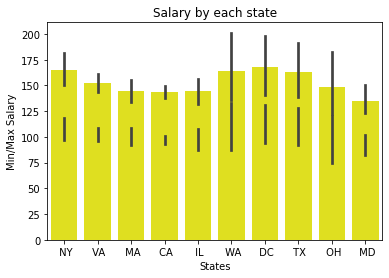

In [407]:
sns.barplot(x='state',y='min_salary',data=df[df['state'].isin(top_states.index)],color='blue')
sns.barplot(x='state',y='max_salary',data=df[df['state'].isin(top_states.index)],color='yellow')
plt.xlabel('States')
plt.ylabel('Min/Max Salary')
plt.title('Salary by each state')
plt.show()

In [408]:
data_science=df[df['simplified_job_title']=='data scientist']
melted_df = data_science.melt(value_vars=['python','sql','statistics','aws','azure','hadoop','spark','tableau','machine learning'],
                              var_name='variable')
filtered_df = melted_df[melted_df['value'] == 1]

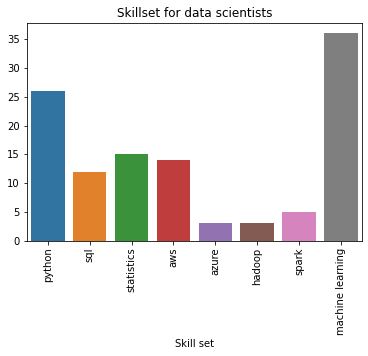

In [421]:
sns.countplot(x='variable',data=filtered_df)
plt.xlabel('Skill Set')
plt.ylabel('')
plt.title('Skillset for data scientists')
plt.xticks(rotation=90)
plt.show()

In [423]:
data_analysis=df[df['simplified_job_title']=='data analyst']
melted_df = data_analysis.melt(value_vars=['python','sql','statistics','aws','azure','hadoop','spark','tableau','machine learning'],
                              var_name='variable')
filtered_df = melted_df[melted_df['value'] == 1]

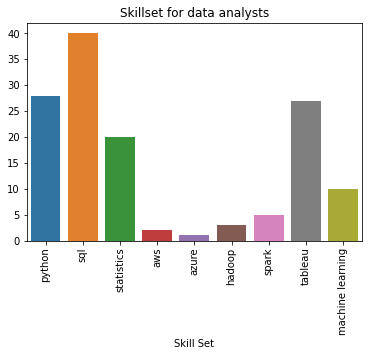

In [424]:
sns.countplot(x='variable',data=filtered_df)
plt.xlabel('Skill Set')
plt.ylabel('')
plt.title('Skillset for data analysts')
plt.xticks(rotation=90)
plt.show()

In [425]:
data_engineer=df[df['simplified_job_title']=='data engineer']
melted_df = data_engineer.melt(value_vars=['python','sql','statistics','aws','azure','hadoop','spark','tableau','machine learning'],
                              var_name='variable')
filtered_df = melted_df[melted_df['value'] == 1]

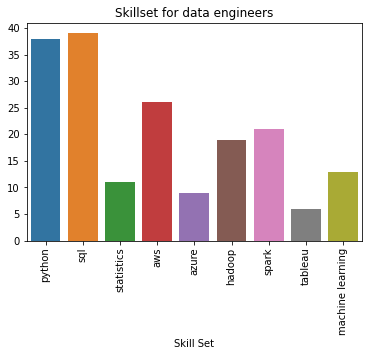

In [426]:
sns.countplot(x='variable',data=filtered_df)
plt.xlabel('Skill Set')
plt.ylabel('')
plt.title('Skillset for data engineers')
plt.xticks(rotation=90)
plt.show()

In [427]:
mle=df[df['simplified_job_title']=='mle']
melted_df = mle.melt(value_vars=['python','sql','statistics','aws','azure','hadoop','spark','tableau','machine learning'],
                              var_name='variable')
filtered_df = melted_df[melted_df['value'] == 1]

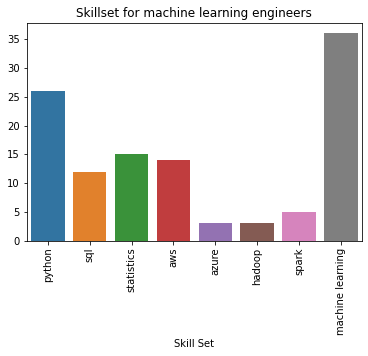

In [428]:
sns.countplot(x='variable',data=filtered_df)
plt.xlabel('Skill Set')
plt.ylabel('')
plt.title('Skillset for machine learning engineers')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Company ratings')

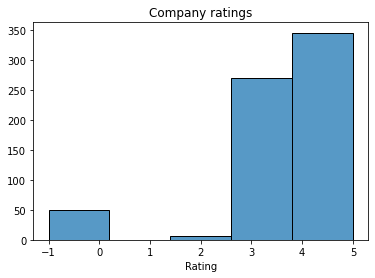

In [442]:
sns.histplot(data=df['Rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('')
plt.title('Company ratings')